In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
df = pd.read_csv('data.csv')

In [3]:
# Data Frame Overview
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
# Data Frame Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB
None


In [5]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082325    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.616243    3.783876    9.485323  407.440313   18.500000  356.600900   
std     28.099130    2.0986

In [6]:
# Data Transformation (Filling missing values and normalizing)
df['RM'] = df['RM'].fillna(df['RM'].median())
df['CRIM_normalized'] = (df['CRIM'] - df['CRIM'].min()) / (df['CRIM'].max() - df['CRIM'].min())


In [7]:
# Data Validation
print(df.isnull().sum())  # Checking for any remaining missing values
print(df[['RM', 'CRIM_normalized']].head())  # Checking transformed columns

CRIM               0
ZN                 0
INDUS              0
CHAS               0
NOX                0
RM                 0
AGE                0
DIS                0
RAD                0
TAX                0
PTRATIO            0
B                  0
LSTAT              0
MEDV               0
CRIM_normalized    0
dtype: int64
      RM  CRIM_normalized
0  6.575         0.000000
1  6.421         0.000236
2  7.185         0.000236
3  6.998         0.000293
4  7.147         0.000705


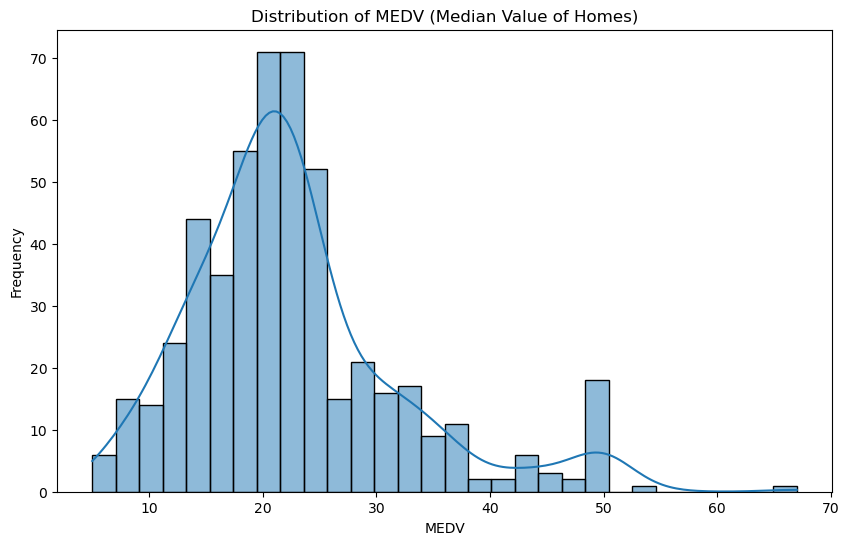

In [8]:
# Data Interpretation - Visualization 1
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

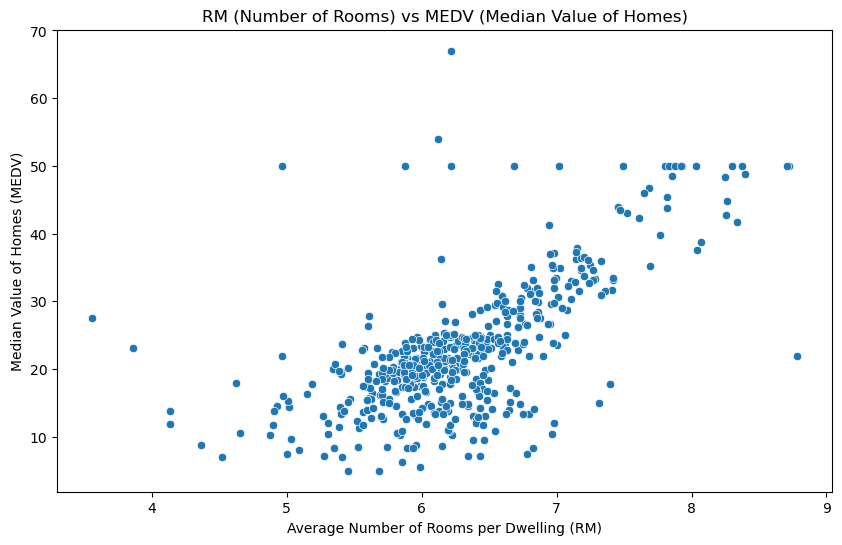

In [9]:
# Data Interpretation - Visualization 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('RM (Number of Rooms) vs MEDV (Median Value of Homes)')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

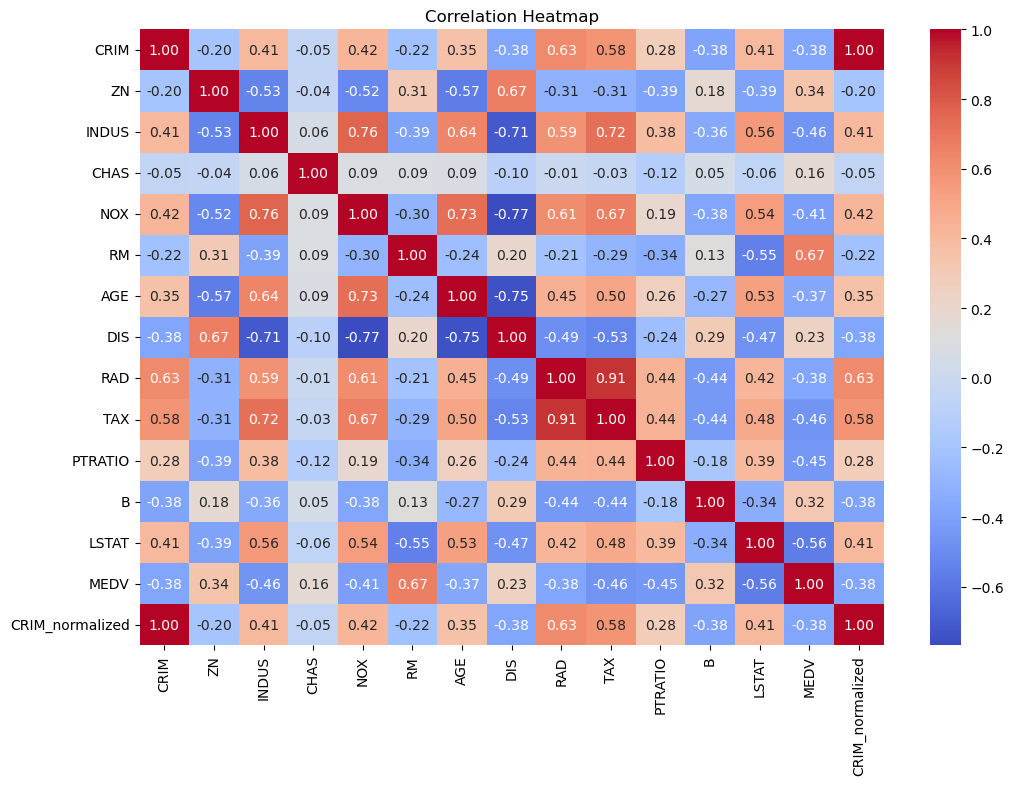

In [10]:
# Data Interpretation - Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

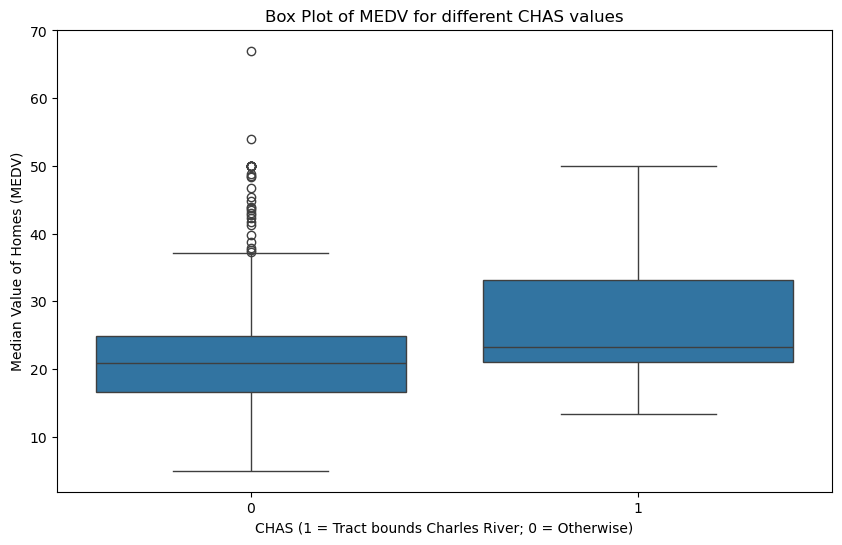

In [11]:
# Data Interpretation - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('Box Plot of MEDV for different CHAS values')
plt.xlabel('CHAS (1 = Tract bounds Charles River; 0 = Otherwise)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

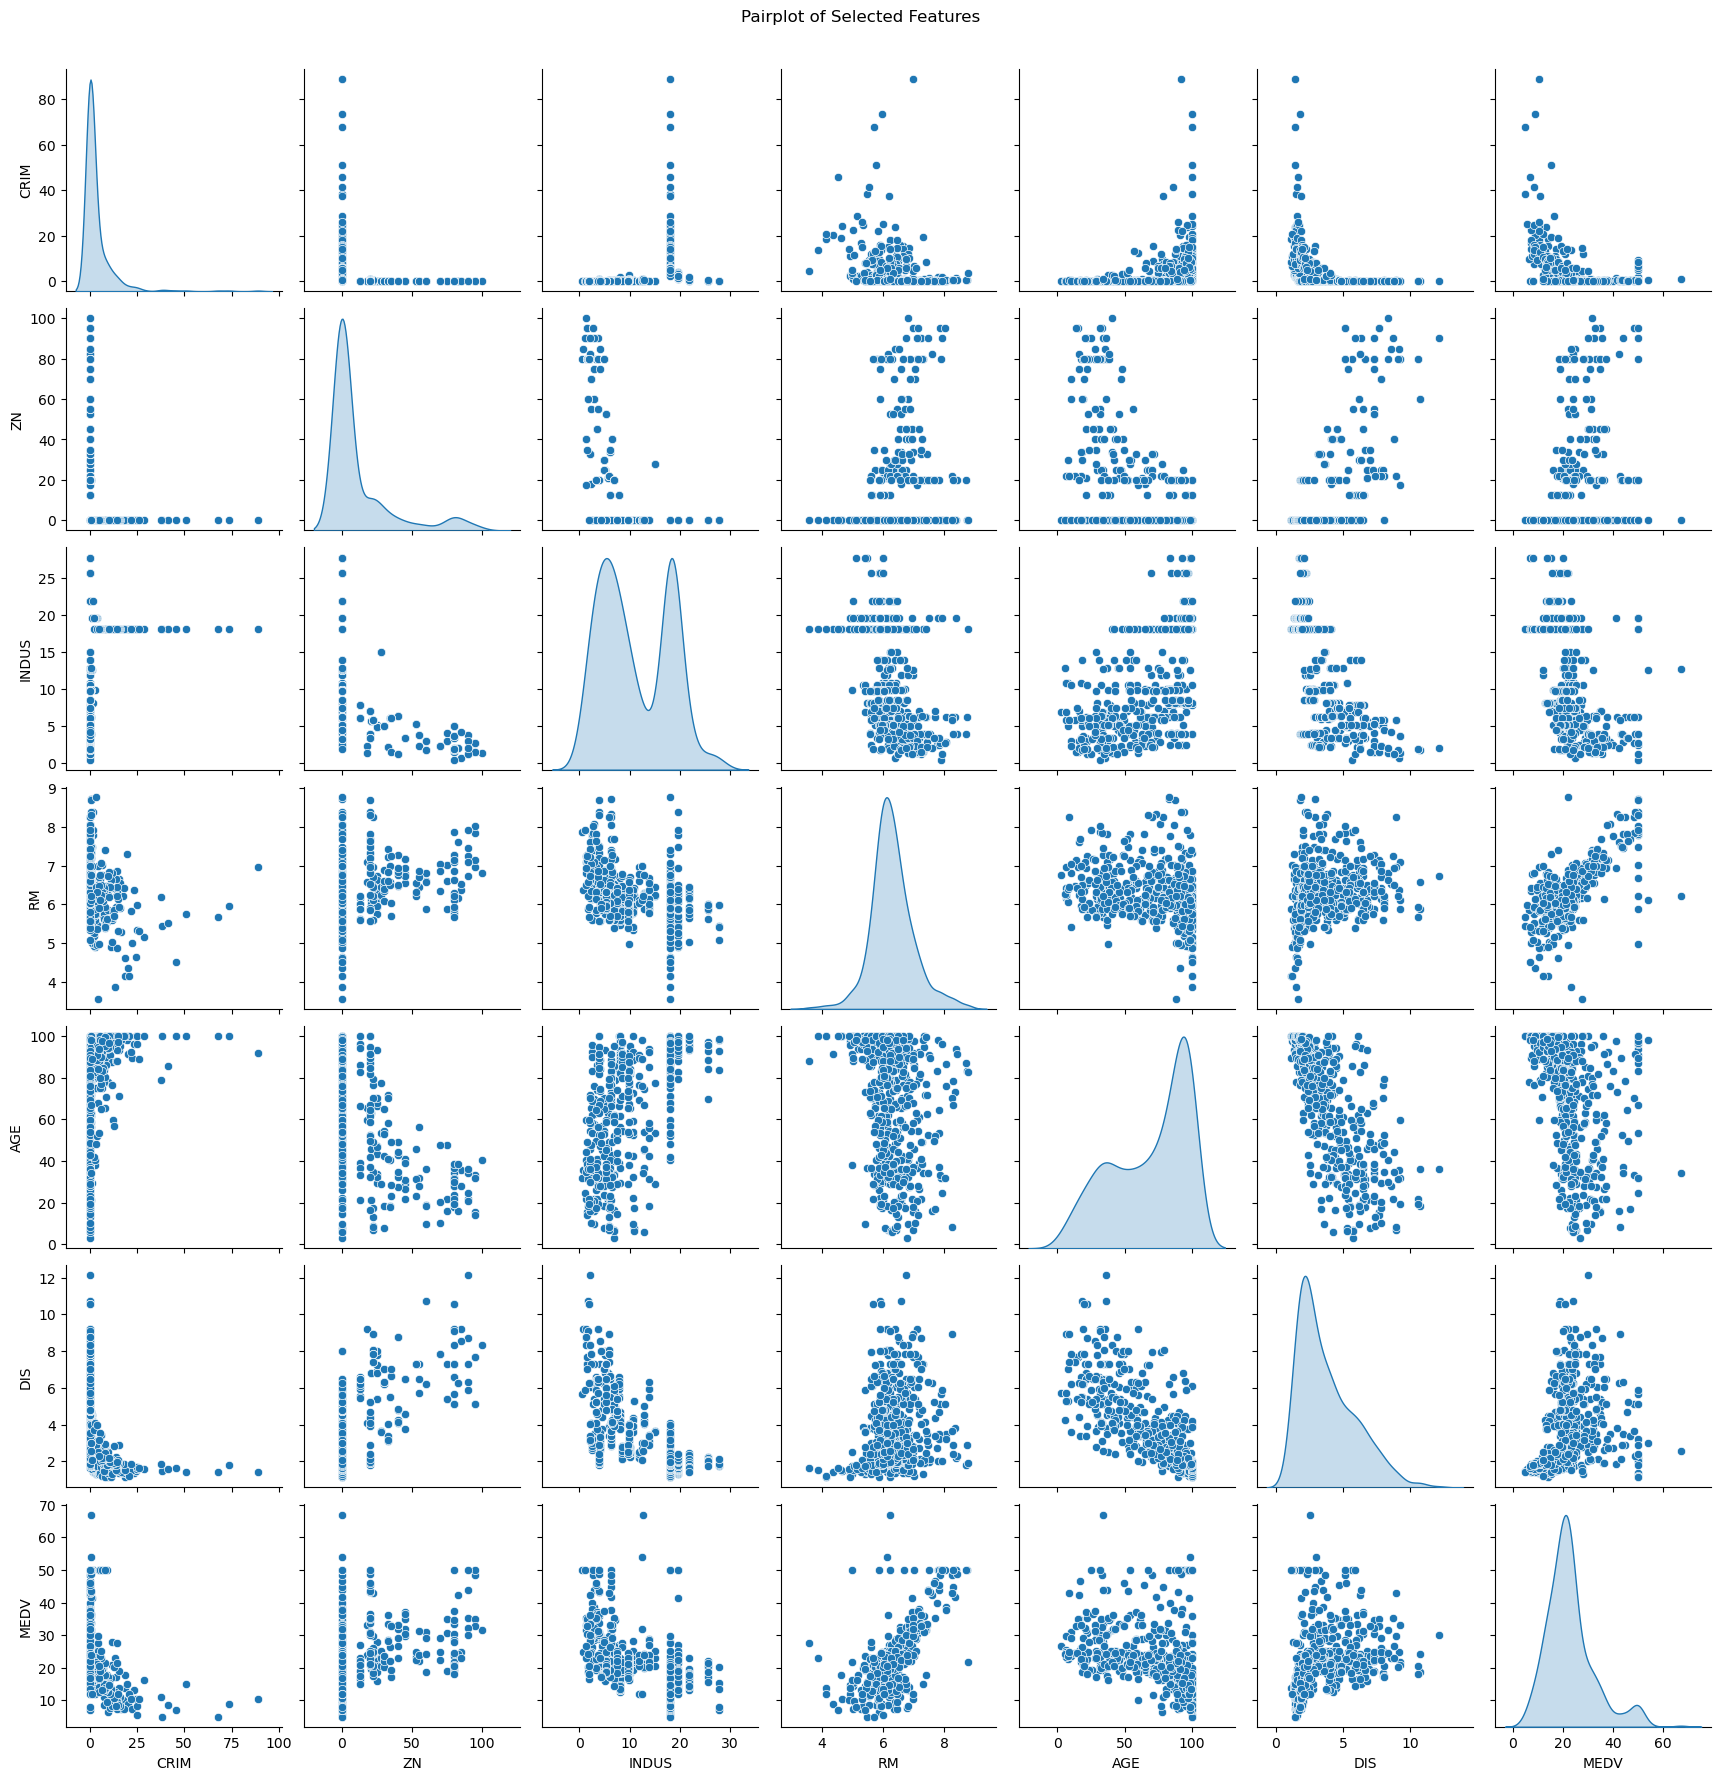

In [12]:
# Data Interpretation - Pairplot
selected_features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'MEDV']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()